les bibliotheque necessaires pour l'analyse textuelle

In [235]:
import os, sys, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [237]:
sns.set()

In [239]:
df = pd.read_csv('train.csv')

In [241]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [243]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [245]:
df.sample(20)

,id,keyword,location,text,target
3645,5194,fatalities,San Francisco,'Motordom' lobbied to change our language arou...,0
2629,3772,destruction,??????? ??????? ????????,@HassanRouhani Wars doomed to destruction loss...,1
1365,1968,burning%20buildings,"Epic City, BB.",I Pledge Allegiance To The P.O.P.E. And The Bu...,1
2196,3145,debris,Hong Kong,Plane debris is from missing MH370 http://t.co...,1
5334,7613,pandemonium,Houston TX,Pandemonium In Aba As Woman Delivers Baby With...,1
676,977,blaze,NaN,@a__cee DAEM GIRL SMOOTH ASF c: ?,0
6066,8665,sinkhole,Êwagger!ÌominicanÌ÷,#LoMasVisto THOUSANDS OF HIPSTERS FEARED LOST:...,1
6648,9524,terrorist,NaN,@BarackObama Senator John McCainÛªs Whoops Mo...,0
6183,8825,sirens,"Nanaimo, BC, Canada",Photoset: hakogaku: ?åÊI am a kurd. i was born...,1
2465,3533,derailment,India,Trains derailment: 'It's the freakiest of frea...,1


Structure df

In [248]:
df.shape

(7613, 5)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [252]:
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [254]:
tmp = df.nunique()

In [256]:
tmp [tmp < 10]

target    2
dtype: int64

In [258]:
tmp [tmp > 1000]

id          7613
location    3341
text        7503
dtype: int64

Duplicated et NAN

In [261]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [263]:
df.isna().mean().sort_values()

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

<Axes: >

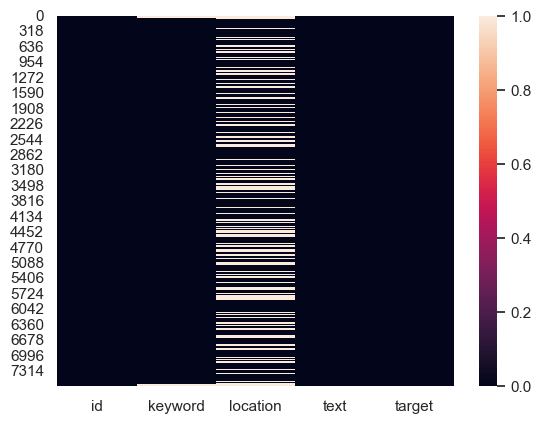

In [265]:
 sns.heatmap(df.isna())

<Axes: >

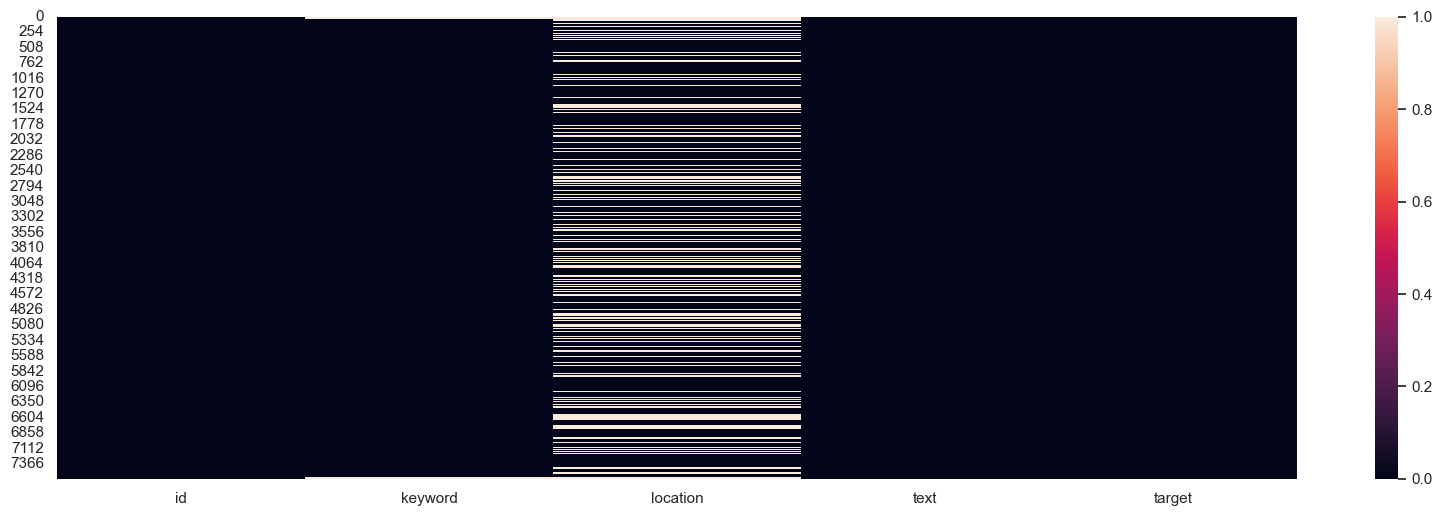

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.heatmap(df.isna())

In [269]:
df.duplicated().sum()

0

In [271]:
df.duplicated(subset='text').sum()

110

In [273]:
for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : id -> duplicated : 0
col : keyword -> duplicated : 7391
col : location -> duplicated : 4271
col : text -> duplicated : 110
col : target -> duplicated : 7611


In [275]:
idx = df.duplicated(subset="text",keep="first")
df.loc[idx, : ].sort_values("text")

,id,keyword,location,text,target
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
3461,4952,exploded,NaN,that exploded &amp; brought about the\nbeginni...,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1


inspection de donnée

In [278]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [280]:
df.describe(include=object)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


Nettoyage

In [283]:
tmp = df.dtypes
tmp

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [285]:
cols = ["text", "target"]
df = df[cols]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


Suppression de NAN

In [288]:
df.isna().mean()

text      0.0
target    0.0
dtype: float64

Duplicated

In [291]:
df.shape

(7613, 2)

In [293]:
idx = df.duplicated(subset="text",keep="first")
df.loc[idx, : ].sort_values("text")

,text,target
4299,#Allah describes piling up #wealth thinking it...,0
4312,#Allah describes piling up #wealth thinking it...,1
6366,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...
3461,that exploded &amp; brought about the\nbeginni...,0
6103,that horrible sinking feeling when youÛªve be...,0
6094,that horrible sinking feeling when youÛªve be...,0
6123,that horrible sinking feeling when youÛªve be...,1


In [295]:
df.drop_duplicates(subset="text", inplace=True)

<Axes: ylabel='count'>

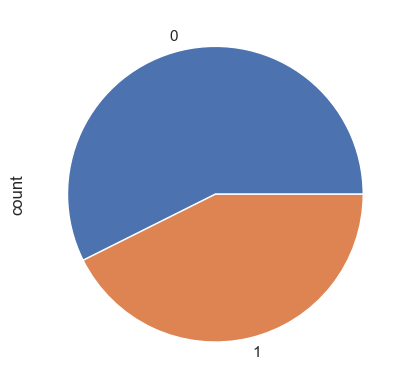

In [297]:
df.target.value_counts().plot(kind="pie")

la notion de longueur de caractere

In [300]:
df.describe(include="object")

,text
count,7503
unique,7503
top,Our Deeds are the Reason of this #earthquake M...
freq,1


In [302]:
df.text.apply(lambda i : len(i))

0        69
1        38
2       133
3        65
4        88
       ... 
7604    136
7605    114
7606    121
7608     83
7612     94
Name: text, Length: 7503, dtype: int64

<Axes: ylabel='text'>

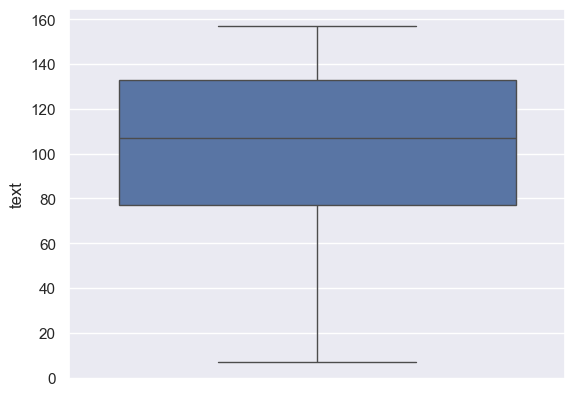

In [304]:
tmp = df.text.str.len()
sns.boxplot(tmp)

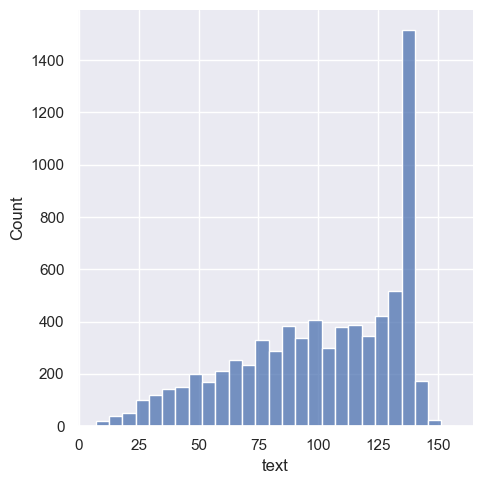

In [306]:
sns.displot(tmp)

In [308]:
df["_len_text"] = tmp
df.head()

,text,target,_len_text
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


Analyse multivarié

In [195]:
cols = ["target", "_len_text"]
df = df[cols]

corr = df.corr()
corr

,target,_len_text
target,1.000000,0.180997
_len_text,0.180997,1.000000


##### mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, square=True)


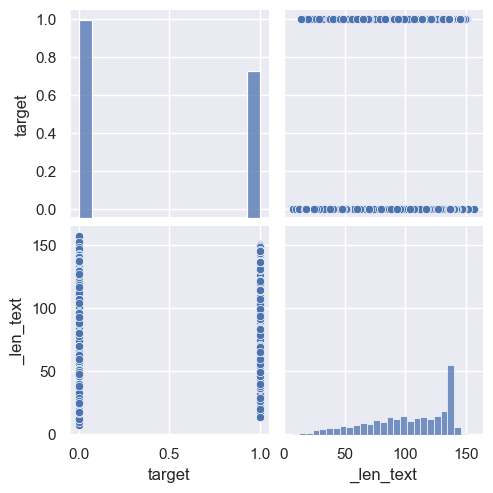

In [215]:
sns.pairplot(df)

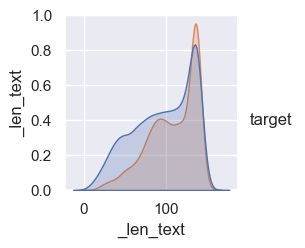

In [217]:
sns.pairplot(df, hue="target")

In [229]:
df.sort_values("_len_text").head(10)

,target,_len_text
4890,0,7
5115,0,7
1882,0,7
4971,0,8
24,0,8
3670,0,8
30,0,8
28,0,9
3667,0,9
6705,0,10


In [231]:
df.sort_values("_len_text").tail(10)

,target,_len_text
261,0,148
2301,0,148
6945,1,148
257,1,148
2718,1,149
635,1,150
633,1,150
614,1,151
4801,0,152
1270,0,157


In [313]:
df.drop(columns="_len_text", inplace=True)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


Exploration de documents et corpus

In [316]:
df_samp = df.sample(20)
df_samp

,text,target
6760,@kunalkapoor Photo of the Day: Storm\nChaser\n...,1
704,@__srajapakse__ Why thank you there missy ?? t...,0
6892,@wrongdejavu I'm traumatised,0
6076,@DavidCovucci We can't because a sinkhole swal...,0
854,Blood Group A +ve is associated with Gastric ...,0
6256,@PrablematicLA @Adweek I'm actually currently ...,1
7480,Ranking #artectura #pop2015 #Nå¼36 Florence + ...,0
4210,@ArianaGrande Girl you still lickin' public d...,0
5263,National Briefing | West: California: Spring O...,1
4529,Unlicensed teen driver among 2 killed in NC cr...,1


In [318]:
for idx, ser in df_samp.iterrows() :
    print(ser["text"])

@kunalkapoor Photo of the Day: Storm
Chaser
http://t.co/4WJy7seHmw
#photography #pod
@__srajapakse__ Why thank you there missy ?? thought it suited the blazing hot summertime ?? yee-haw! ??
@wrongdejavu I'm traumatised
@DavidCovucci We can't because a sinkhole swallowed every taco place in the neighborhood
Blood Group  A +ve is associated with Gastric Carcinoma says text book...Another fragile gene in my body....
@PrablematicLA @Adweek I'm actually currently dressed for a snowstorm...despite being in the middle of a Texas summer. Thanks office A/C.
Ranking #artectura #pop2015 #Nå¼36 Florence + The Machine - Ship To Wreck https://t.co/9LE0B19lVF  #music #playlist #YouTube
@ArianaGrande  Girl you still lickin' public donuts???  Health hazard....u should be in jail.
National Briefing | West: California: Spring Oil Spill Estimate Grows: Documents released on Wednesday d... http://t.co/hTxAi05y7B (NYT)
Unlicensed teen driver among 2 killed in NC crash http://t.co/Woc6AkEHYX
Morgan Silver Do

In [322]:
for idx, ser in df_samp.iterrows() :
    txt_1 = f"target : {ser['target']}\n"
    print(txt_1 + ser['text']+"...." + "\n\n")

target : 1
@kunalkapoor Photo of the Day: Storm
Chaser
http://t.co/4WJy7seHmw
#photography #pod....


target : 0
@__srajapakse__ Why thank you there missy ?? thought it suited the blazing hot summertime ?? yee-haw! ??....


target : 0
@wrongdejavu I'm traumatised....


target : 0
@DavidCovucci We can't because a sinkhole swallowed every taco place in the neighborhood....


target : 0
Blood Group  A +ve is associated with Gastric Carcinoma says text book...Another fragile gene in my body........


target : 1
@PrablematicLA @Adweek I'm actually currently dressed for a snowstorm...despite being in the middle of a Texas summer. Thanks office A/C.....


target : 0
Ranking #artectura #pop2015 #Nå¼36 Florence + The Machine - Ship To Wreck https://t.co/9LE0B19lVF  #music #playlist #YouTube....


target : 0
@ArianaGrande  Girl you still lickin' public donuts???  Health hazard....u should be in jail.....


target : 1
National Briefing | West: California: Spring Oil Spill Estimate Grows: Document

In [324]:
def print_sample(sub_df, n_samp=10) :
    """print out n_samp documents from a corpus"""
    samp = sub_df.sample(n_samp)
    for idx, ser  in  samp.iterrows():
         txt_1 = f"target : {ser['target']}\n"
    print(txt_1 + ser['text']+"...." + "\n\n")
        

In [326]:
df_1 = df[df.target == 1]
df_1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [340]:
print_sample(df_1)

target : 1
Beach did damage to my shit....


